In the last notebook, `target_corr_filter.ipynb`, the mean `R^2` value on unseen data obtained from (1) filtering features by their correlation with the target variable and (2) taking the logarithm of the target variable was `0.8054` with standard deviation `0.0524`, so we write `R^2 = 0.8054 +/- 0.0524`. Let's see if we can increase the performance by including "product features". That is, we will be creating new features by constructing all possible unique products of the original independent features.

In [18]:
from utils import test_train_split
from utils import LinearRegression, Metrics
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt, numpy as np, pandas as pd, random

In [19]:
df = pd.read_csv('AmesHousing_NormNumericalFeatures.csv')
cols = list(df.columns)

X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

X.shape, y.shape

((2747, 25), (2747, 1))

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
metrics = Metrics(X,y,lin_reg)
metrics.pretty_print_stats()

sse:     0.4355
sst:     2.2990
mse:     0.0002
r^2:     0.8106
adj_r^2: 0.8088


Let's include all squared features.

In [21]:
log_sale_prices = df['Log SalePrice']
df.drop(columns=['Log SalePrice'], inplace=True)

cols = list(df.columns)
for col in cols:
    
    df[f'Sq {col}'] = df[col].apply(lambda x: x**2)
    
df['Log SalePrice'] = log_sale_prices
df.head()

,Pool Area,Kitchen AbvGr,Screen Porch,Enclosed Porch,Bedroom AbvGr,Bsmt Unf SF,Lot Area,2nd Flr SF,Half Bath,Bsmt Full Bath,...,Sq Year Remod/Add,Sq Garage Yr Blt,Sq Year Built,Sq Full Bath,Sq 1st Flr SF,Sq Total Bsmt SF,Sq Garage Area,Sq Garage Cars,Sq Gr Liv Area,Log SalePrice
0,0.0,0.333333,0.000000,0.0,0.500000,0.188784,0.147599,0.000000,0.0,0.5,...,0.950868,0.950868,0.950868,0.0625,0.105641,0.031244,0.125911,0.16,0.086150,0.907194
1,0.0,0.333333,0.208333,0.0,0.333333,0.115582,0.053994,0.000000,0.0,0.0,...,0.951838,0.951838,0.951838,0.0625,0.030926,0.020838,0.240680,0.04,0.025220,0.854242
2,0.0,0.333333,0.000000,0.0,0.500000,0.173801,0.066283,0.000000,0.5,0.0,...,0.948928,0.948928,0.948928,0.0625,0.068040,0.047312,0.043965,0.04,0.055486,0.890707
3,0.0,0.333333,0.000000,0.0,0.500000,0.447346,0.051848,0.000000,0.5,0.5,...,0.958646,0.958646,0.958646,0.2500,0.171505,0.119257,0.123065,0.16,0.139862,0.916543
4,0.0,0.333333,0.000000,0.0,0.500000,0.058647,0.064252,0.339467,0.5,0.0,...,0.988095,0.987107,0.987107,0.2500,0.033175,0.023068,0.104927,0.16,0.083364,0.898022


In [22]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

lin_reg.fit(X, y)
metrics = Metrics(X,y,lin_reg)
metrics.pretty_print_stats()

sse:     0.3371
sst:     2.2990
mse:     0.0001
r^2:     0.8534
adj_r^2: 0.8507


In [29]:
X_train, y_train, X_test, y_test = test_train_split(df, 0.2)
lin_reg.fit(X_train, y_train)
metrics = Metrics(X_test,y_test,lin_reg)
metrics.pretty_print_stats()

sse:     0.0618
sst:     0.4134
mse:     0.0001
r^2:     0.8504
adj_r^2: 0.8337


We observe good performance from the inclusion of only squared features. Let's implement target correlation filtering.

In [43]:
corr_thresh_min = 0.03
target_corr_dict = df.corr().iloc[:,-1].to_dict()
sort_target_corr = dict(sorted(target_corr_dict.items(), key=lambda item: np.abs(item[1])))
high_corr_feats = list({k: v for k,v in sort_target_corr.items() 
                   if np.abs(v) > corr_thresh_min and k != 'Log SalePrice'}.keys())

high_corr_df = df[high_corr_feats+['Log SalePrice']]

X = high_corr_df.iloc[:,:-1].values
y = high_corr_df.iloc[:,-1:].values

lin_reg.fit(X, y)

metrics = Metrics(X,y,lin_reg)
metrics.pretty_print_stats()

sse:     0.3371
sst:     2.2990
mse:     0.0001
r^2:     0.8534
adj_r^2: 0.8507


Filtering has resulted in a higher adjusted `R^2` and a much higher sum of square deviations from the average, which is suspicious.

In [44]:
high_corr_df

,Sq Enclosed Porch,Sq Pool Area,Pool Area,Sq Lot Area,Sq Screen Porch,Screen Porch,Kitchen AbvGr,Sq Kitchen AbvGr,Enclosed Porch,Sq Open Porch SF,...,1st Flr SF,Year Built,Sq Year Built,Garage Area,Total Bsmt SF,Sq Gr Liv Area,Sq Garage Cars,Garage Cars,Gr Liv Area,Log SalePrice
0,0.0,0.0,0.0,0.021786,0.000000,0.000000,0.333333,0.111111,0.0,0.011831,...,0.325025,0.975124,0.950868,0.354839,0.176759,0.086150,0.16,0.4,0.293513,0.907194
1,0.0,0.0,0.0,0.002915,0.043403,0.208333,0.333333,0.111111,0.0,0.000000,...,0.175859,0.975622,0.951838,0.490591,0.144354,0.025220,0.04,0.2,0.158809,0.854242
2,0.0,0.0,0.0,0.004393,0.000000,0.000000,0.333333,0.111111,0.0,0.003989,...,0.260844,0.974129,0.948928,0.209677,0.217512,0.055486,0.04,0.2,0.235555,0.890707
3,0.0,0.0,0.0,0.002688,0.000000,0.000000,0.333333,0.111111,0.0,0.000000,...,0.414132,0.979104,0.958646,0.350806,0.345336,0.139862,0.16,0.4,0.373981,0.916543
4,0.0,0.0,0.0,0.004128,0.000000,0.000000,0.333333,0.111111,0.0,0.003558,...,0.182139,0.993532,0.987107,0.323925,0.151882,0.083364,0.16,0.4,0.288727,0.898022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,0.0,0.0,0.0,0.008634,0.000000,0.000000,0.333333,0.111111,0.0,0.000000,...,0.240236,0.975124,0.950868,0.387097,0.200327,0.047065,0.16,0.4,0.216944,0.870588
2743,0.0,0.0,0.0,0.001360,0.000000,0.000000,0.333333,0.111111,0.0,0.000000,...,0.196860,0.987065,0.974297,0.395161,0.164157,0.031604,0.16,0.4,0.177774,0.876805
2744,0.0,0.0,0.0,0.001704,0.000000,0.000000,0.333333,0.111111,0.0,0.000000,...,0.177036,0.986567,0.973315,0.325269,0.141408,0.025559,0.16,0.4,0.159872,0.870588
2745,0.0,0.0,0.0,0.002163,0.000000,0.000000,0.333333,0.111111,0.0,0.004444,...,0.272620,0.982090,0.964500,0.280914,0.227332,0.060609,0.16,0.4,0.246189,0.889843


Now, let's include all *unique* products of distinct features.

In [45]:
df = pd.read_csv('AmesHousing_NormNumericalFeatures.csv')

log_sale_prices = df['Log SalePrice']
df.drop(columns=['Log SalePrice'], inplace=True)

cols = list(df.columns)

In [46]:
df.head()

,Pool Area,Kitchen AbvGr,Screen Porch,Enclosed Porch,Bedroom AbvGr,Bsmt Unf SF,Lot Area,2nd Flr SF,Half Bath,Bsmt Full Bath,...,TotRms AbvGrd,Year Remod/Add,Garage Yr Blt,Year Built,Full Bath,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area
0,0.0,0.333333,0.000000,0.0,0.500000,0.188784,0.147599,0.000000,0.0,0.5,...,0.466667,0.975124,0.975124,0.975124,0.25,0.325025,0.176759,0.354839,0.4,0.293513
1,0.0,0.333333,0.208333,0.0,0.333333,0.115582,0.053994,0.000000,0.0,0.0,...,0.333333,0.975622,0.975622,0.975622,0.25,0.175859,0.144354,0.490591,0.2,0.158809
2,0.0,0.333333,0.000000,0.0,0.500000,0.173801,0.066283,0.000000,0.5,0.0,...,0.400000,0.974129,0.974129,0.974129,0.25,0.260844,0.217512,0.209677,0.2,0.235555
3,0.0,0.333333,0.000000,0.0,0.500000,0.447346,0.051848,0.000000,0.5,0.5,...,0.533333,0.979104,0.979104,0.979104,0.50,0.414132,0.345336,0.350806,0.4,0.373981
4,0.0,0.333333,0.000000,0.0,0.500000,0.058647,0.064252,0.339467,0.5,0.0,...,0.400000,0.994030,0.993532,0.993532,0.50,0.182139,0.151882,0.323925,0.4,0.288727


In [47]:
feat_pairs = list()
for feat_1 in cols:
    for feat_2 in cols:
        if [feat_1, feat_2] not in feat_pairs and [feat_2, feat_1] not in feat_pairs:
            feat_pairs.append([feat_1, feat_2])
            df[f'{feat_1} x {feat_2}'] = df[feat_1]*df[feat_2]

In [48]:
df.head()

,Pool Area,Kitchen AbvGr,Screen Porch,Enclosed Porch,Bedroom AbvGr,Bsmt Unf SF,Lot Area,2nd Flr SF,Half Bath,Bsmt Full Bath,...,Total Bsmt SF x Total Bsmt SF,Total Bsmt SF x Garage Area,Total Bsmt SF x Garage Cars,Total Bsmt SF x Gr Liv Area,Garage Area x Garage Area,Garage Area x Garage Cars,Garage Area x Gr Liv Area,Garage Cars x Garage Cars,Garage Cars x Gr Liv Area,Gr Liv Area x Gr Liv Area
0,0.0,0.333333,0.000000,0.0,0.500000,0.188784,0.147599,0.000000,0.0,0.5,...,0.031244,0.062721,0.070704,0.051881,0.125911,0.141935,0.104150,0.16,0.117405,0.086150
1,0.0,0.333333,0.208333,0.0,0.333333,0.115582,0.053994,0.000000,0.0,0.0,...,0.020838,0.070819,0.028871,0.022925,0.240680,0.098118,0.077910,0.04,0.031762,0.025220
2,0.0,0.333333,0.000000,0.0,0.500000,0.173801,0.066283,0.000000,0.5,0.0,...,0.047312,0.045607,0.043502,0.051236,0.043965,0.041935,0.049391,0.04,0.047111,0.055486
3,0.0,0.333333,0.000000,0.0,0.500000,0.447346,0.051848,0.000000,0.5,0.5,...,0.119257,0.121146,0.138134,0.129149,0.123065,0.140323,0.131195,0.16,0.149592,0.139862
4,0.0,0.333333,0.000000,0.0,0.500000,0.058647,0.064252,0.339467,0.5,0.0,...,0.023068,0.049198,0.060753,0.043853,0.104927,0.129570,0.093526,0.16,0.115491,0.083364


In [49]:
df['Log SalePrice'] = log_sale_prices

In [50]:
df

,Pool Area,Kitchen AbvGr,Screen Porch,Enclosed Porch,Bedroom AbvGr,Bsmt Unf SF,Lot Area,2nd Flr SF,Half Bath,Bsmt Full Bath,...,Total Bsmt SF x Garage Area,Total Bsmt SF x Garage Cars,Total Bsmt SF x Gr Liv Area,Garage Area x Garage Area,Garage Area x Garage Cars,Garage Area x Gr Liv Area,Garage Cars x Garage Cars,Garage Cars x Gr Liv Area,Gr Liv Area x Gr Liv Area,Log SalePrice
0,0.0,0.333333,0.000000,0.0,0.500000,0.188784,0.147599,0.000000,0.0,0.5,...,0.062721,0.070704,0.051881,0.125911,0.141935,0.104150,0.16,0.117405,0.086150,0.907194
1,0.0,0.333333,0.208333,0.0,0.333333,0.115582,0.053994,0.000000,0.0,0.0,...,0.070819,0.028871,0.022925,0.240680,0.098118,0.077910,0.04,0.031762,0.025220,0.854242
2,0.0,0.333333,0.000000,0.0,0.500000,0.173801,0.066283,0.000000,0.5,0.0,...,0.045607,0.043502,0.051236,0.043965,0.041935,0.049391,0.04,0.047111,0.055486,0.890707
3,0.0,0.333333,0.000000,0.0,0.500000,0.447346,0.051848,0.000000,0.5,0.5,...,0.121146,0.138134,0.129149,0.123065,0.140323,0.131195,0.16,0.149592,0.139862,0.916543
4,0.0,0.333333,0.000000,0.0,0.500000,0.058647,0.064252,0.339467,0.5,0.0,...,0.049198,0.060753,0.043853,0.104927,0.129570,0.093526,0.16,0.115491,0.083364,0.898022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,0.0,0.333333,0.000000,0.0,0.666667,0.000000,0.092917,0.000000,0.0,0.5,...,0.077546,0.080131,0.043460,0.149844,0.154839,0.083978,0.16,0.086778,0.047065,0.870588
2743,0.0,0.333333,0.000000,0.0,0.500000,0.078767,0.036874,0.000000,0.0,0.5,...,0.064869,0.065663,0.029183,0.156152,0.158065,0.070249,0.16,0.071110,0.031604,0.876805
2744,0.0,0.333333,0.000000,0.0,0.333333,0.102312,0.041279,0.000000,0.0,0.5,...,0.045995,0.056563,0.022607,0.105800,0.130108,0.052002,0.16,0.063949,0.025559,0.870588
2745,0.0,0.333333,0.000000,0.0,0.333333,0.083476,0.046505,0.000000,0.0,0.5,...,0.063861,0.090933,0.055967,0.078913,0.112366,0.069158,0.16,0.098476,0.060609,0.889843


In [ ]:
# When including only squared product features:

# sse:     0.3371
# sst:     2.2990
# mse:     0.0001
# r^2:     0.8534
# adj_r^2: 0.8507

In [69]:
lin_reg = LinearRegression()

In [64]:
corr_thresh_min = 0.4

for i in range(20):
    
    corr_thresh_min = 0.4 - i*0.01
    print(f'Correlation threshold min: {corr_thresh_min}')
    
    target_corr_dict = df.corr().iloc[:,-1].to_dict()
    sort_target_corr = dict(sorted(target_corr_dict.items(), key=lambda item: np.abs(item[1])))
    high_corr_feats = list({k: v for k,v in sort_target_corr.items() 
                       if np.abs(v) > corr_thresh_min and k != 'Log SalePrice'}.keys())

    high_corr_df = df[high_corr_feats+['Log SalePrice']]

    X = high_corr_df.iloc[:,:-1].values
    y = high_corr_df.iloc[:,-1:].values

    lin_reg.fit(X, y)

    metrics = Metrics(X,y,lin_reg)
    metrics.pretty_print_stats()

Correlation threshold min: 0.4
sse:     0.2947
sst:     2.2990
mse:     0.0001
r^2:     0.8718
adj_r^2: 0.8650
Correlation threshold min: 0.39
sse:     0.2912
sst:     2.2990
mse:     0.0001
r^2:     0.8733
adj_r^2: 0.8662
Correlation threshold min: 0.38
sse:     0.2854
sst:     2.2990
mse:     0.0001
r^2:     0.8759
adj_r^2: 0.8683
Correlation threshold min: 0.37
sse:     0.2822
sst:     2.2990
mse:     0.0001
r^2:     0.8773
adj_r^2: 0.8692
Correlation threshold min: 0.36000000000000004
sse:     0.2807
sst:     2.2990
mse:     0.0001
r^2:     0.8779
adj_r^2: 0.8697
Correlation threshold min: 0.35000000000000003
sse:     0.2790
sst:     2.2990
mse:     0.0001
r^2:     0.8786
adj_r^2: 0.8703
Correlation threshold min: 0.34
sse:     0.2772
sst:     2.2990
mse:     0.0001
r^2:     0.8794
adj_r^2: 0.8707
Correlation threshold min: 0.33
sse:     0.2752
sst:     2.2990
mse:     0.0001
r^2:     0.8803
adj_r^2: 0.8712
Correlation threshold min: 0.32
sse:     0.2733
sst:     2.2990
mse:     0.

In [74]:
opt_corr_thresh_min = 0.32

In [75]:
target_corr_dict = df.corr().iloc[:,-1].to_dict()
sort_target_corr = dict(sorted(target_corr_dict.items(), key=lambda item: np.abs(item[1])))
high_corr_feats = list({k: v for k,v in sort_target_corr.items() 
                   if np.abs(v) > opt_corr_thresh_min and k != 'Log SalePrice'}.keys())

high_corr_df = df[high_corr_feats+['Log SalePrice']]

X = high_corr_df.iloc[:,:-1].values
y = high_corr_df.iloc[:,-1:].values

lin_reg.fit(X, y)

metrics = Metrics(X,y,lin_reg)
metrics.pretty_print_stats()

sse:     0.2733
sst:     2.2990
mse:     0.0001
r^2:     0.8811
adj_r^2: 0.8717


In [76]:
high_corr_df.head()

,Kitchen AbvGr x Open Porch SF,Wood Deck SF,Bedroom AbvGr x Wood Deck SF,Wood Deck SF x Year Remod/Add,Wood Deck SF x Garage Yr Blt,Wood Deck SF x Year Built,Mas Vnr Area x Mas Vnr Area,Lot Area x Total Bsmt SF,Half Bath x Mas Vnr Area,Open Porch SF x Mas Vnr Area,...,Full Bath x Total Bsmt SF,Full Bath x Garage Area,Year Remod/Add x Gr Liv Area,Garage Area x Gr Liv Area,Garage Yr Blt x Gr Liv Area,1st Flr SF x Garage Cars,Year Built x Gr Liv Area,Total Bsmt SF x Garage Cars,Garage Cars x Gr Liv Area,Log SalePrice
0,0.036257,0.147472,0.073736,0.143803,0.143803,0.143803,0.004900,0.026090,0.00000,0.007614,...,0.044190,0.088710,0.286212,0.104150,0.286212,0.130010,0.286212,0.070704,0.117405,0.907194
1,0.000000,0.098315,0.032772,0.095918,0.095918,0.095918,0.000000,0.007794,0.00000,0.000000,...,0.036088,0.122648,0.154937,0.077910,0.154937,0.035172,0.154937,0.028871,0.031762,0.854242
2,0.021053,0.275983,0.137992,0.268843,0.268843,0.268843,0.004556,0.014417,0.03375,0.004263,...,0.054378,0.052419,0.229461,0.049391,0.229461,0.052169,0.229461,0.043502,0.047111,0.890707
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017905,0.00000,0.000000,...,0.172668,0.175403,0.366166,0.131195,0.366166,0.165653,0.366166,0.138134,0.149592,0.916543
4,0.019883,0.148876,0.074438,0.147988,0.147914,0.147914,0.000000,0.009759,0.00000,0.000000,...,0.075941,0.161962,0.287004,0.093526,0.286860,0.072856,0.286860,0.060753,0.115491,0.898022


In [79]:
unseen_data_r_sqs = list()
for i in range(50):
    lin_reg = LinearRegression()
    X_train, y_train, X_test, y_test = test_train_split(high_corr_df, 0.2)
    lin_reg.fit(X_train, y_train)
    metrics = Metrics(X_test, y_test, lin_reg)
    unseen_data_r_sqs.append(metrics.r_sq())

In [82]:
np.mean(unseen_data_r_sqs)

0.8322413249687088

In [83]:
np.std(unseen_data_r_sqs)

0.021698825630377578

We have successfully pushed the mean `R^2` value up to `0.8322` and lowered the standard deviation to `0.0217`. This means that the product features have not only helped improve the average performance of the algorithm but have also increased the consistency of this performance on unseen data.

In [84]:
high_corr_df.head()

,Kitchen AbvGr x Open Porch SF,Wood Deck SF,Bedroom AbvGr x Wood Deck SF,Wood Deck SF x Year Remod/Add,Wood Deck SF x Garage Yr Blt,Wood Deck SF x Year Built,Mas Vnr Area x Mas Vnr Area,Lot Area x Total Bsmt SF,Half Bath x Mas Vnr Area,Open Porch SF x Mas Vnr Area,...,Full Bath x Total Bsmt SF,Full Bath x Garage Area,Year Remod/Add x Gr Liv Area,Garage Area x Gr Liv Area,Garage Yr Blt x Gr Liv Area,1st Flr SF x Garage Cars,Year Built x Gr Liv Area,Total Bsmt SF x Garage Cars,Garage Cars x Gr Liv Area,Log SalePrice
0,0.036257,0.147472,0.073736,0.143803,0.143803,0.143803,0.004900,0.026090,0.00000,0.007614,...,0.044190,0.088710,0.286212,0.104150,0.286212,0.130010,0.286212,0.070704,0.117405,0.907194
1,0.000000,0.098315,0.032772,0.095918,0.095918,0.095918,0.000000,0.007794,0.00000,0.000000,...,0.036088,0.122648,0.154937,0.077910,0.154937,0.035172,0.154937,0.028871,0.031762,0.854242
2,0.021053,0.275983,0.137992,0.268843,0.268843,0.268843,0.004556,0.014417,0.03375,0.004263,...,0.054378,0.052419,0.229461,0.049391,0.229461,0.052169,0.229461,0.043502,0.047111,0.890707
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017905,0.00000,0.000000,...,0.172668,0.175403,0.366166,0.131195,0.366166,0.165653,0.366166,0.138134,0.149592,0.916543
4,0.019883,0.148876,0.074438,0.147988,0.147914,0.147914,0.000000,0.009759,0.00000,0.000000,...,0.075941,0.161962,0.287004,0.093526,0.286860,0.072856,0.286860,0.060753,0.115491,0.898022


In [85]:
X = high_corr_df.iloc[:,:-1].values
y = high_corr_df.iloc[:,-1:].values

lin_reg.fit(X, y)

In [87]:
coeffs = [item[0] for item in lin_reg.coeffs_]

In [88]:
len(coeffs)

202

In [89]:
feat_import_dict = dict(zip(list(high_corr_df.columns)[:-1], coeffs))
feat_import_dict

{'Kitchen AbvGr x Open Porch SF': 0.03921130150592944,
 'Wood Deck SF': -0.17791414579187403,
 'Bedroom AbvGr x Wood Deck SF': -0.02831663493407177,
 'Wood Deck SF x Year Remod/Add': 0.24883056164253503,
 'Wood Deck SF x Garage Yr Blt': -0.30470854218583554,
 'Wood Deck SF x Year Built': 0.2810967584955506,
 'Mas Vnr Area x Mas Vnr Area': 0.007510710878250393,
 'Lot Area x Total Bsmt SF': 0.36521371201524744,
 'Half Bath x Mas Vnr Area': 0.012392427600843803,
 'Open Porch SF x Mas Vnr Area': -0.048093668162891845,
 '2nd Flr SF x TotRms AbvGrd': 0.16087548857467482,
 'Bedroom AbvGr x Open Porch SF': 0.03190693227952579,
 'Lot Area x 2nd Flr SF': 0.10501957847736776,
 'Wood Deck SF x Open Porch SF': 0.0367247387516727,
 'Bsmt Unf SF x 1st Flr SF': 0.1458376337577647,
 'Open Porch SF': -0.5337617633340415,
 'Wood Deck SF x BsmtFin SF 1': -0.09330552067604003,
 'Bsmt Unf SF x Wood Deck SF': -0.023730015133878624,
 'Lot Area x TotRms AbvGrd': 0.37150907594696037,
 'Open Porch SF x Year Remo

In [92]:
sorted_coeffs_names_dict = dict(sorted(feat_import_dict.items(), key=lambda x: np.abs(x[1])))
sorted_coeffs_names_dict

{'Half Bath x Full Bath': -0.000423600671638269,
 'BsmtFin SF 1 x 1st Flr SF': -0.0015152695505094016,
 'Mas Vnr Area x TotRms AbvGrd': -0.0018593543281895109,
 'Open Porch SF x 1st Flr SF': -0.003988089740232681,
 'Open Porch SF x TotRms AbvGrd': -0.004190979033410258,
 'Bsmt Full Bath x Mas Vnr Area': 0.004514847328039195,
 'Bsmt Unf SF x Fireplaces': -0.0045281651125606,
 'Open Porch SF x Total Bsmt SF': 0.004561007326628896,
 'Open Porch SF x Full Bath': 0.005005570249295488,
 'Fireplaces x Mas Vnr Area': 0.005685571088633878,
 'Bsmt Full Bath x Full Bath': -0.005994778591684735,
 'TotRms AbvGrd x Full Bath': -0.006093361984312651,
 'Mas Vnr Area x Garage Cars': 0.006161569224786945,
 'Bsmt Unf SF x Garage Cars': -0.006475775575381704,
 'Kitchen AbvGr x 1st Flr SF': -0.006548656922404916,
 'Open Porch SF x Garage Cars': 0.007072893893791843,
 'Mas Vnr Area x Mas Vnr Area': 0.007510710878250393,
 'BsmtFin SF 1 x Gr Liv Area': -0.008145078099914826,
 'Kitchen AbvGr x BsmtFin SF 1': 0

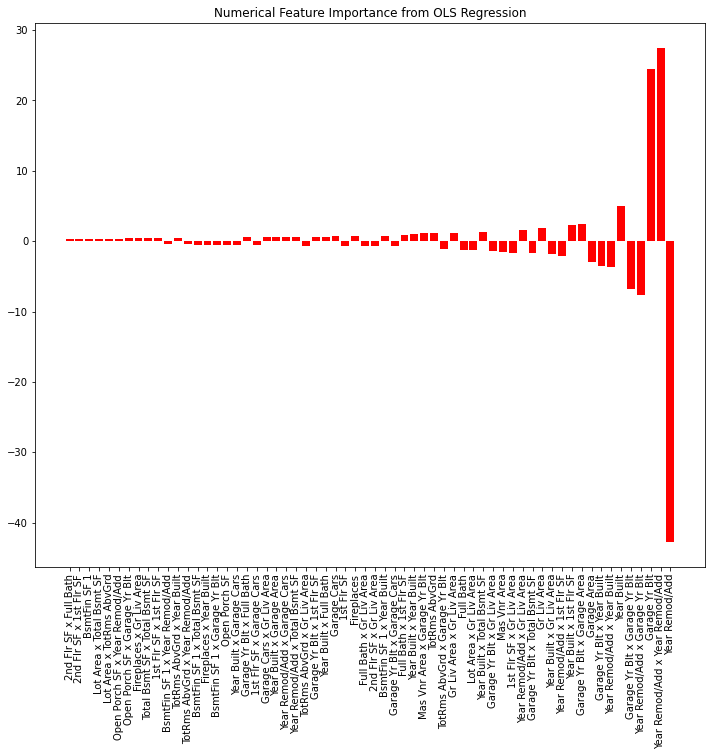

In [108]:
x = list(sorted_coeffs_names_dict.keys())[140:]
y = list(sorted_coeffs_names_dict.values())[140:]
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation=90)
plt.title('Numerical Feature Importance from OLS Regression')
plt.bar(x,y, color='red')
plt.show()

In [107]:
len(list(sorted_coeffs_names_dict.keys())[140:])

62

An important observation from the plot of the strongest features above is that most of these strongest features are products of single features. In fact, there are 12 single features out of 62 total features. This means that we have really constructed new features that correlate significantly with the target variable.

In [103]:
X = high_corr_df[list(sorted_coeffs_names_dict.keys())[130:]+['Log SalePrice']].iloc[:,:-1].values
y = high_corr_df[list(sorted_coeffs_names_dict.keys())[130:]+['Log SalePrice']].iloc[:,-1:].values

In [104]:
lin_reg.fit(X, y)

In [105]:
metrics = Metrics(X,y,lin_reg)
metrics.pretty_print_stats()

sse:     0.3278
sst:     2.2990
mse:     0.0001
r^2:     0.8574
adj_r^2: 0.8536


Even though there are many features with quite small regression coefficients, keeping them allows us to push the `R^2` value as high as possible.

I am now going to write some code to extract dollar amount sale price predictions from the trained model and data above. Hopefully, we'll be able to write some functions that take a set of regression coefficients together with a normalized dataframe and produce residual fractions for the prediction/test set.